# Übungszettel 5: Clustering

## Maschinelles Lernen - WiSe 23/24

### Abgabe 22.11.2023, 23:55 Uhr

*Hinweise:*
- Übungsaufgaben **müssen** in Gruppen von 3-4 Personen abgegeben werden. **Einzelabgaben werden nicht korrigiert bzw. bewertet.**
- Es wird pro Übungszettel nur eine Aufgabe bewertet, die übrigen Aufgaben dienen zur selbstständigen Vertiefung des Vorlesungsstoffs. Für diese Aufgaben werden nach der Abgabe Musterlösungen bereitgestellt.
- Die Lösungen sollen in diesem IPython Notebook realisiert werden, wobei Teilaufgaben und Zwischenergebnisse ausgegeben bzw. visualisiert werden sollen.
- Für die Abgabe sollen Sie dieses IPython Notebook und ggf. zugehörige Dateien in ein **Ziparchiv** packen und im Ilias hochladen. Das Ziparchiv soll nach folgendem Muster benannt werden:
`UebungXX_Nachname1_Nachname2_Nachname3.zip`, wobei die Nachnamen in alphabetischer Reihenfolge angegeben und Umlaute ggf. ersetzt werden sollen. Bei Nichtbefolgung dieser Vorgabe können Punkte abgezogen werden.

In [19]:
ds = [1,2,3,4,5]

labels = [None] * len(ds)

labels[2] = 'check'
print(labels)

[None, None, 'check', None, None]


---

## Aufgabe 1: K-Means++

a) Implementieren Sie eine Funktion `k_means(data, k)`, die den K-means-Algorithmus auf ein Numpy-Array mit Objektkoordinaten anwendet und die Clusterzuordnung jedes Punktes sowie die Clusterzentren zurückliefert. Verwenden Sie keine Bibliotheken wie `sklearn`, sondern setzen Sie den in der Vorlesung vorgestellten Algorithmus um.

b) Ergänzen Sie Ihre Funktion um einen weiteren Parameter `initialization`, über den spezifiziert wird, wie die Cluster initialisiert werden. Implementierne Sie folgende Fälle:
- `initialization == 'random'`: zufällige Cluster-Initialisierung zwischen dem Minimum und Maximum der Daten
- `initialization == '++'`: Cluster-Initialisierung von L-Means++ (siehe https://en.wikipedia.org/wiki/K-means%2B%2B)

c) Lesen Sie die Datei `clustering.csv` ein und wenden Sie K-Means für $k=6$ an. 

Lassen Sie jedes der folgenden Clusterings mindestens fünf Mal durchlaufen und visualisieren Sie die jeweiligen Ergebnisse als Scatterplots, in denen erkennbar ist, welcher Punkt zu welchem Cluster gehört.

1. Ihre Implementierung mit zufälliger Initialisierung 
2. Die Implementierung aus `sklearn` mit zufälliger Initialisierung
3. Ihre Implementierung mit K-Means++-Initialisierung
4. Die Implementierung aus `sklearn` mit K-Means++-Initialisierung

---
## Aufgabe 2: Dichte-basiertes Clustering (0,5+0,5+4 Punkte)

a) Beschreiben Sie kurz, wann dichte-basierte Clusteringverfahren eingesetzt werden und welche Vorteile und Nachteile es gibt.

Dichte-basierte Clusteringverfahren, wie z.B. DBSCAN (Density-Based Spatial Clustering of Applications with Noise), werden in Situationen eingesetzt, in denen die Daten Cluster unterschiedlicher Formen und Größen aufweisen. Diese Methoden identifizieren Cluster basierend auf der Dichte der Datenpunkte.
- Vorteile: Flexibilität in der Clusterform, Robustheit gegenüber Ausreißern, Keine Notwendigkeit, die Anzahl der Cluster im Voraus zu bestimmen.
- Nachteile: Schwierigkeit bei der Wahl der Parameter, Schwierigkeiten bei unterschiedlichen Dichtebereichen, Leistungsprobleme bei großen Datensätzen.


b) Erklären Sie den Unterschied zwischen dichte-erreichbaren und dichte-verbundenen Punkten (z.B. anhand einer Skizze). 

c) Implementieren Sie die Methoden `DBSCAN`, `expandCluster` und `regionQuery` in der Datei `DBSCAN.py`.

['noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise']


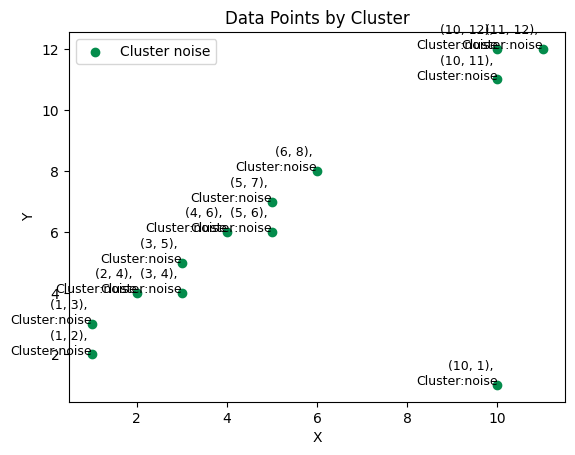

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def DBSCAN(ds, eps, min_pts):
    """
    Cluster a dataset using DBSCAN.

    :param ds: dataset, list of points
    :param eps: threshold distance
    :param min_pts: minimum number of points per cluster
    :cluster: group of object, all teh element in this group have the same characteristic
    :return: list of cluster labels (0 to n), where 0 corresponds to noise
    """
    # Set all points to `unvisited`
    labels = [None] * len(ds)
    # First cluster id (i.e. noise)
    c = 0 
    for p in range(len(ds)):
        # Put your code here
        if labels[p] is not None: #skip if this point already visited
            continue
        nbs = regionQuery(ds, p, eps) #find all the neighrbour point inside distance eps
        
        if len(nbs) >= min_pts:
            print(f"Check: {nbs}")
            c+=1
            expandCluster(ds, labels, p, nbs, c, eps, min_pts)
        else:
            labels[p] = 'noise'
        
    print(labels)    
    return labels


def expandCluster(ds, labels, p, nbs, c, eps, min_pts):
    """
    Grows a new cluster with label `c` from seed point `p`,
    i.e. finds all points that belong to this new cluster.

    :param ds: dataset, list of points
    :param labels: list for cluster labels of dataset points
    :param p: index of seed point for new cluster
    :param nbs: neighbors of p
    :param c: label for the new cluster
    :param eps: threshold distance
    :param min_pts: minimum number of neighbors
    """
    # Put your code here
    labels[p] = c #labels the point with cluster c

    i = 0
    while i < len(nbs):
        #print(f"Check nbs: {nbs}")
        point_index  = nbs[i]
        if(point_index==-1):
            print(f"Error: This point doesn't exist") 
            continue
        
        elif labels[point_index] is None  :
            
            labels[point_index] = c
            point_nbs = regionQuery(ds, point_index, eps)
            if len(point_nbs) >= min_pts:
                nbs += point_nbs
        elif labels[point_index] == 'noise':
            labels[point_index] = c
        i+=1
            
            
    


def regionQuery(ds, q, eps):
    """
    Finds all points in dataset `ds` within distance `eps` of point `q`.
    :param nbs: neighbors of p
    :param ds: dataset
    :param q: index of point
    :param eps: threshold distance
    :return: points which are within threshold distance `eps`
    """
    nbs = []
    # Put your code here
    for i in range(len(ds)):
        if i==q:
            continue
        if np.linalg.norm(np.array(ds[q]) - np.array(ds[i])) <= eps: #if the distance between point q and i <= eps
            nbs.append(i)
    
    return(nbs)

def find_index(ds,target):
    # Find the index 
    index = next((i for i, point in enumerate(ds) if np.array_equal(point, target)), -1)
    # Print the result
    print(f"The index of {target} in ds is: {index}")
    return index
    
if __name__ == "__main__":
    #ds = [np.array([1, 2]), np.array([3, 4]), np.array([5, 6]), np.array([10,11])]
    # create ds with 10 random points
    ds = [  np.array([1, 2]), 
        np.array([3, 4]), 
        np.array([5, 6]), 
        np.array([10,11]),
        np.array([11,12]),
        np.array([10,12]),
        np.array([1, 3]),
        np.array([2, 4]),
        np.array([3, 5]),
        np.array([4, 6]),
        np.array([5, 7]),
        np.array([6, 8]),
        np.array([10,1])]

    #find_index(ds,np.array([10,11]))
    #print(regionQuery(ds,2,2))
    labels = DBSCAN(ds, 2, 2) 
    
    
   
    # Extract x and y coordinates from the data points
    x = [point[0] for point in ds]
    y = [point[1] for point in ds]

    # Find the unique cluster labels
    unique_labels = set(labels)

    # Generate a random color for each cluster
    colors = {label: np.random.rand(3,) for label in unique_labels} #RGB=3 colors

    # Plot the data points, colored by cluster
    for label in unique_labels:
        # Points in the current cluster
        cluster_points = [(x[i], y[i]) for i in range(len(labels)) if labels[i] == label]

        # Separate x and y coordinates
        cluster_x = [point[0] for point in cluster_points]
        cluster_y = [point[1] for point in cluster_points]

        # Plot the cluster points
        plt.scatter(cluster_x, cluster_y, color=colors[label], label=f'Cluster {label}')

    # Add annotations, labels, and title
    for i in range(len(ds)):
        plt.text(x[i], y[i], f'({x[i]}, {y[i]}), \nCluster:{labels[i]}', fontsize=9, ha='right')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Data Points by Cluster')
    plt.legend()
    plt.show()
    
       
    


d) Wenden Sie die zuvor implementierte Methode `DBSCAN` auf die Punkte aus der Datei `clustering.csv` an. Wählen Sie passende Werte für `min_pts` und `eps` und visualisieren Sie das Ergebnis.

[array([ 0.14901425, -0.42461122]), array([-0.04147929, -0.1261936 ]), array([ 0.19430656, -0.10281435]), array([ 0.45690896, -0.24068318]), array([-0.07024601, -0.04838571]), array([-0.07024109,  0.12121526]), array([0.47376384, 0.56585577]), array([0.23023042, 0.05237334]), array([-0.14084232,  0.07726512]), array([ 0.16276801, -0.02233377]), array([-0.13902531, -0.57563136]), array([-0.13971893, -0.00795416]), array([0.07258868, 0.01806906]), array([-0.57398407,  0.73897263]), array([-0.51747535, -0.05770829]), array([-0.16868626,  0.0904642 ]), array([-0.30384934, -0.01041353]), array([ 0.0942742 , -0.35060341]), array([-0.27240722,  0.34284684]), array([-0.42369111,  0.22557991]), array([0.43969463, 0.23730958]), array([-0.06773289, -0.27281624]), array([0.02025846, 0.42083829]), array([-0.42742446, -0.42055532]), array([-0.16331482,  0.17605713]), array([0.03327678, 0.65713669]), array([-0.34529807, -0.2971609 ]), array([ 0.11270941, -0.16988932]), array([-0.18019161,  0.02989541

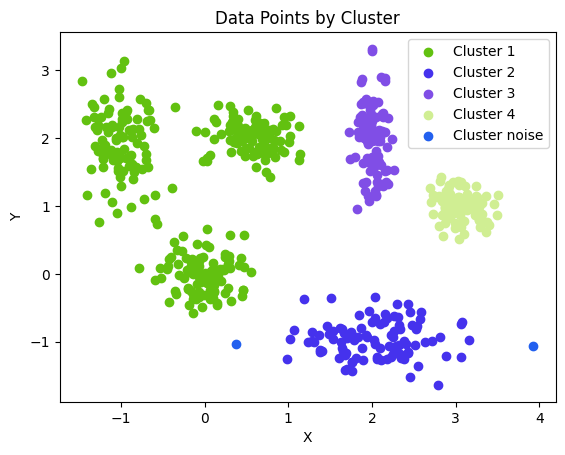

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#path
path = 'clustering.csv'

# Read CSV without a header and assign column names
data = pd.read_csv(path, header=None, names=['X', 'Y'])

ds = []
for index,row in data.iterrows():
    ds.append(np.array(row))
    
print(ds)   

#find_index(ds,np.array([10,11]))
    #print(regionQuery(ds,2,2))
labels = DBSCAN(ds, 0.5, 2) 

 # Extract x and y coordinates from the data points
x = [point[0] for point in ds]
y = [point[1] for point in ds]

# Find the unique cluster labels
unique_labels = set(labels)

# Generate a random color for each cluster
colors = {label: np.random.rand(3,) for label in unique_labels} #RGB=3 colors

# Plot the data points, colored by cluster
for label in unique_labels:
    # Points in the current cluster
    cluster_points = [(x[i], y[i]) for i in range(len(labels)) if labels[i] == label]

    # Separate x and y coordinates
    cluster_x = [point[0] for point in cluster_points]
    cluster_y = [point[1] for point in cluster_points]

    # Plot the cluster points
    plt.scatter(cluster_x, cluster_y, color=colors[label], label=f'Cluster {label}')

# Add annotations, labels, and title
#for i in range(len(ds)):
#    plt.text(x[i], y[i], f'({x[i]}, {y[i]}), \nCluster:{labels[i]}', fontsize=9, ha='right')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points by Cluster')
plt.legend()
plt.show()
    
